In [77]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
from altair import Column
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [78]:
# Step 2: Initial Data Exploration
Data_df = pd.read_csv('OCD Patient Dataset_ Demographics & Clinical Data.csv')

In [79]:
#
# Display the first few rows of the dataset
Data_df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [80]:
# Get a summary of the dataset
Data_df.info()

# Check for missing values
print(Data_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [96]:
# Step3:Data Preprocessing
Data_df['Gender'] = Data_df['Gender'].replace({'Female': 1, 'Male': 2})
Data_df['Family History of OCD'] = Data_df['Family History of OCD'].replace({'No': 0, 'Yes': 1})
Data_df['Depression Diagnosis'] = Data_df['Depression Diagnosis'].replace({'No': 0, 'Yes': 1}).astype(int)
Data_df['Anxiety Diagnosis'] = Data_df['Anxiety Diagnosis'].replace({'No': 0, 'Yes': 1}).astype(int)

In [82]:
#3.2 Handle Missing Data
imputer = SimpleImputer(strategy='most_frequent')
Data_df[['Previous Diagnoses' , 'Medications']] = imputer.fit_transform(Data_df[['Previous Diagnoses' , 'Medications']])

In [83]:
# Summary statistics for categorical columns
print(Data_df.describe(include='all'))

         Patient ID          Age       Gender  Ethnicity Marital Status  \
count   1500.000000  1500.000000  1500.000000       1500           1500   
unique          NaN          NaN          NaN          4              3   
top             NaN          NaN          NaN  Caucasian         Single   
freq            NaN          NaN          NaN        398            511   
mean    5541.254000    46.781333     1.502000        NaN            NaN   
std     2562.389469    16.830321     0.500163        NaN            NaN   
min     1017.000000    18.000000     1.000000        NaN            NaN   
25%     3338.000000    32.000000     1.000000        NaN            NaN   
50%     5539.500000    47.000000     2.000000        NaN            NaN   
75%     7745.500000    61.000000     2.000000        NaN            NaN   
max     9995.000000    75.000000     2.000000        NaN            NaN   

       Education Level OCD Diagnosis Date  Duration of Symptoms (months)  \
count             1500 

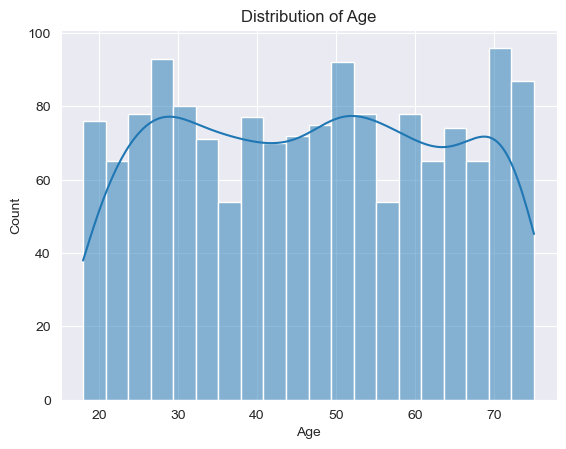

In [84]:
# Step 4: Visualizing Demographic Data
# Age distribution
sns.histplot(Data_df['Age'], bins=20 , kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

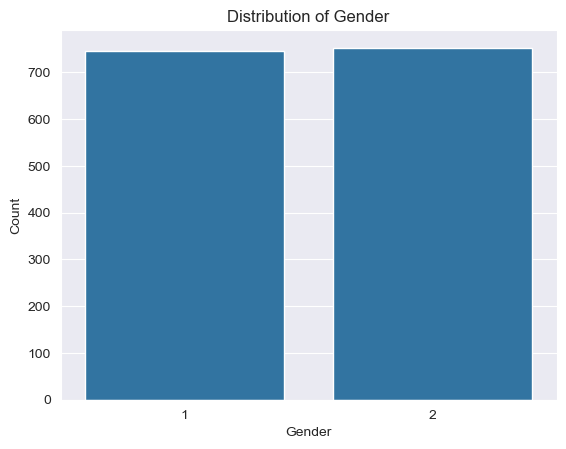

In [85]:
# Gender distribution
sns.countplot(x='Gender' , data=Data_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

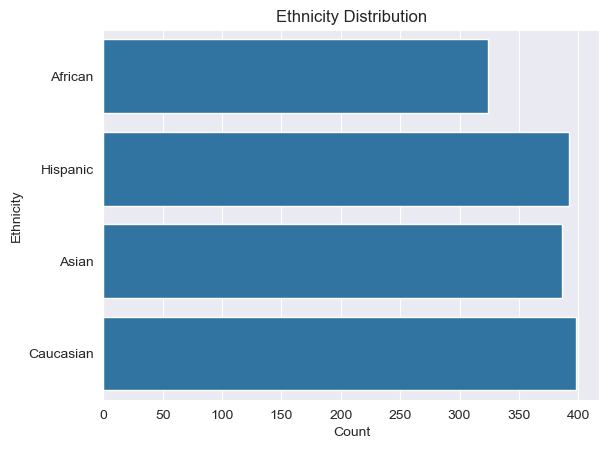

In [86]:
# Ethnicity distribution
sns.countplot(y='Ethnicity', data=Data_df)
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

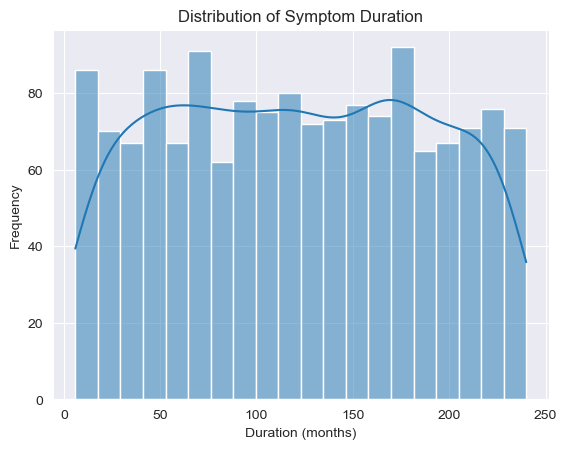

In [87]:
# Step 5: Clinical Data Analysis

sns.histplot(Data_df['Duration of Symptoms (months)'], bins=20,
kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()

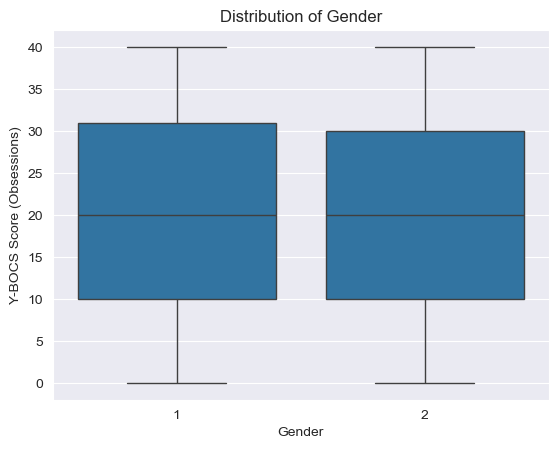

In [88]:
# Boxplot of Y-BOCS Scores by Gender
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=Data_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.show()

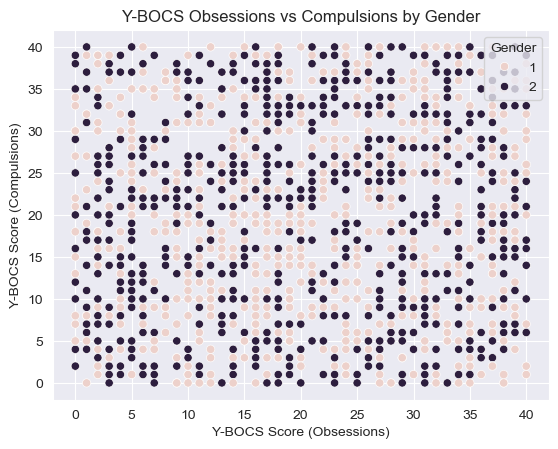

In [89]:
# Relationship between Obsession and Compulsion Y-BOCS Scores
sns.scatterplot(
    x='Y-BOCS Score (Obsessions)',
    y='Y-BOCS Score (Compulsions)',
    hue='Gender',
    data=Data_df
)

plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.title('Y-BOCS Obsessions vs Compulsions by Gender')
plt.legend(title='Gender')
plt.show()

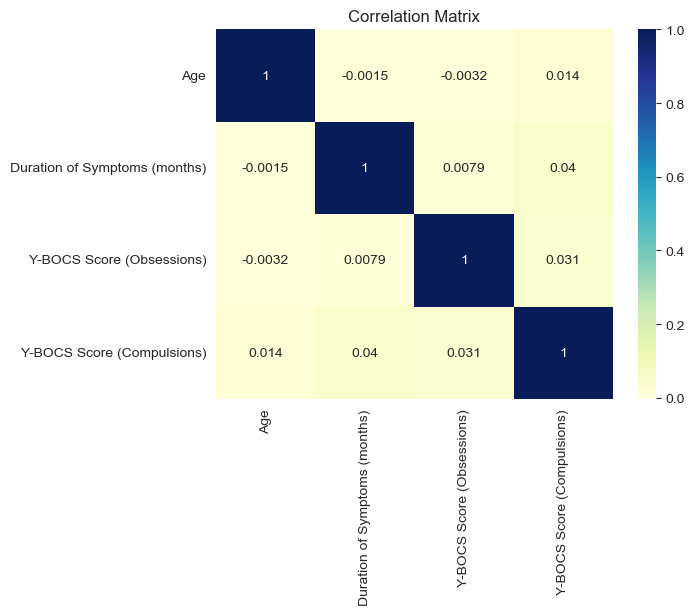

In [90]:
#Step 6: Correlation Analysis
# Compute the correlation matrix
corr_Matrix = Data_df[[
    'Age',
    'Duration of Symptoms (months)',
    'Y-BOCS Score (Obsessions)',
    'Y-BOCS Score (Compulsions)'
]].corr()

# Plot the heatmap
sns.heatmap(corr_Matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()


In [91]:
# Step5:Machine learning
# 5.1 Feature Engineering
X = Data_df.drop(columns=['Patient ID', 'OCD Diagnosis Date', 'Medications'])
y = Data_df['Medications']


In [92]:
#5.2 Scaling
from sklearn.preprocessing import LabelEncoder

label_cols = [
    'Ethnicity', 'Marital Status', 'Education Level',
    'Previous Diagnoses', 'Obsession Type', 'Compulsion Type', 'Medications'
]

le = LabelEncoder()
for col in label_cols:
    Data_df[col] = le.fit_transform(Data_df[col].astype(str))
df_encoded = pd.get_dummies(Data_df, drop_first=True)


In [93]:
#5.2 Scaling
X = Data_df.drop(columns=['Patient ID', 'OCD Diagnosis Date', 'Medications'])
y = Data_df['Medications']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Accuracy:  0.5


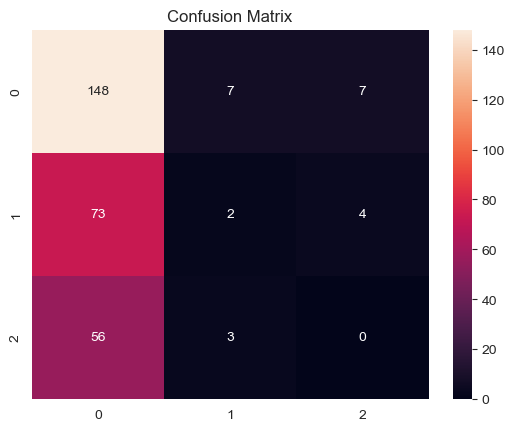

In [94]:
# 5.4 Model Training & Evaluation
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
